In [268]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [269]:
df = pd.read_csv('dulieuxettuyendaihoc.csv' , header=0,delimiter="," ,encoding="Utf=8")
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [270]:
data = df[['T1','T2','T3','T4','T5','T6','TOANLOGICPHANTICH','GT']]

In [271]:
data.rename(columns={'TOANLOGICPHANTICH':'LOGIC'}, inplace=True)

C:\Users\nhatt\AppData\Local\Temp\ipykernel_13900\3373958501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'TOANLOGICPHANTICH':'LOGIC'}, inplace=True)


In [272]:
print(data.shape)

(100, 8)


In [273]:
print(data.isnull().sum())

T1       0
T2       0
T3       0
T4       0
T5       0
T6       0
LOGIC    0
GT       0
dtype: int64


In [274]:
print(data.describe())


               T1          T2          T3          T4          T5        T6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.0000   
mean     5.946000    6.374000    6.383000    6.291000    6.717000    6.9370   
std      1.608338    1.561443    1.574484    1.469563    1.478059    1.3632   
min      2.400000    2.800000    2.300000    2.900000    3.000000    3.7000   
25%      5.000000    5.300000    5.175000    5.300000    5.800000    6.0000   
50%      5.850000    6.250000    6.650000    6.350000    6.800000    7.1000   
75%      7.200000    7.525000    7.500000    7.600000    7.800000    8.0000   
max      9.300000    9.600000    9.500000    9.400000    9.500000    9.5000   

            LOGIC  
count  100.000000  
mean     4.255000  
std      1.060053  
min      1.500000  
25%      3.500000  
50%      4.125000  
75%      4.750000  
max      8.000000  


In [275]:
data['GT_Nam'] = (data['GT'] == 'M').astype(int)

# Tạo cột mới cho giới tính nữ 
data['GT_Nu'] = (data['GT'] == 'F').astype(int)

# Xóa cột GT cũ
data = data.drop(columns=['GT'])

print(data.head())

    T1   T2   T3   T4   T5   T6  LOGIC  GT_Nam  GT_Nu
0  7.2  8.4  7.4  7.2  7.4  6.9   3.25       0      1
1  5.4  6.3  4.3  4.9  3.0  4.0   4.00       1      0
2  5.6  5.0  2.8  6.1  4.8  5.7   6.75       1      0
3  6.6  5.1  5.9  4.1  6.1  7.4   4.25       1      0
4  6.0  5.4  7.6  4.4  6.8  8.0   4.50       1      0


C:\Users\nhatt\AppData\Local\Temp\ipykernel_13900\2422052149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GT_Nam'] = (data['GT'] == 'M').astype(int)
C:\Users\nhatt\AppData\Local\Temp\ipykernel_13900\2422052149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GT_Nu'] = (data['GT'] == 'F').astype(int)


In [276]:
X=data[['T1','T2','T3','T4','T5','T6','GT_Nam','GT_Nu']].values
y=data[['LOGIC']].values

In [277]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 8)
(20, 8)
(80, 1)
(20, 1)


In [278]:
X_train


array([[3.7, 4.1, 3.1, 3.4, 5.5, 5.7, 0. , 1. ],
       [9.3, 9.6, 7.1, 8.5, 8.5, 7.8, 1. , 0. ],
       [8.1, 8.8, 9.2, 8.8, 8.9, 8.5, 1. , 0. ],
       [4.9, 6.1, 2.5, 6.2, 4.9, 6.5, 1. , 0. ],
       [4.6, 7.2, 7.6, 6.2, 8. , 7.2, 1. , 0. ],
       [5.7, 3.9, 5.7, 4.6, 6.8, 7.3, 1. , 0. ],
       [4.3, 5.3, 7.3, 7.7, 7.4, 7.1, 1. , 0. ],
       [7.9, 8.2, 8.1, 6.9, 8. , 8.1, 1. , 0. ],
       [5.2, 6.3, 7.8, 7.6, 6.2, 7.3, 0. , 1. ],
       [6.3, 6.3, 5.2, 6.1, 6. , 5.7, 1. , 0. ],
       [6.9, 5.4, 5.3, 5.3, 7.2, 7.1, 0. , 1. ],
       [6.5, 5.3, 6.1, 5.7, 7.1, 6.9, 1. , 0. ],
       [4.4, 4.4, 5.1, 5.6, 5.8, 5.8, 1. , 0. ],
       [5.6, 5. , 2.8, 6.1, 4.8, 5.7, 1. , 0. ],
       [5.8, 6.4, 7.3, 7.1, 7.3, 6.7, 1. , 0. ],
       [8.2, 6.4, 6.1, 5.8, 7.1, 8.9, 0. , 1. ],
       [7.3, 7.5, 8. , 7.7, 7.8, 8.1, 1. , 0. ],
       [7.3, 5.9, 7.1, 7.7, 7.9, 6.6, 1. , 0. ],
       [8.1, 4.4, 5. , 2.9, 5.8, 5.6, 0. , 1. ],
       [5. , 5.5, 2.3, 4.1, 3.4, 4.1, 0. , 1. ],
       [6. , 7.3, 7.

In [279]:
print(X_train)

[[3.7 4.1 3.1 3.4 5.5 5.7 0.  1. ]
 [9.3 9.6 7.1 8.5 8.5 7.8 1.  0. ]
 [8.1 8.8 9.2 8.8 8.9 8.5 1.  0. ]
 [4.9 6.1 2.5 6.2 4.9 6.5 1.  0. ]
 [4.6 7.2 7.6 6.2 8.  7.2 1.  0. ]
 [5.7 3.9 5.7 4.6 6.8 7.3 1.  0. ]
 [4.3 5.3 7.3 7.7 7.4 7.1 1.  0. ]
 [7.9 8.2 8.1 6.9 8.  8.1 1.  0. ]
 [5.2 6.3 7.8 7.6 6.2 7.3 0.  1. ]
 [6.3 6.3 5.2 6.1 6.  5.7 1.  0. ]
 [6.9 5.4 5.3 5.3 7.2 7.1 0.  1. ]
 [6.5 5.3 6.1 5.7 7.1 6.9 1.  0. ]
 [4.4 4.4 5.1 5.6 5.8 5.8 1.  0. ]
 [5.6 5.  2.8 6.1 4.8 5.7 1.  0. ]
 [5.8 6.4 7.3 7.1 7.3 6.7 1.  0. ]
 [8.2 6.4 6.1 5.8 7.1 8.9 0.  1. ]
 [7.3 7.5 8.  7.7 7.8 8.1 1.  0. ]
 [7.3 5.9 7.1 7.7 7.9 6.6 1.  0. ]
 [8.1 4.4 5.  2.9 5.8 5.6 0.  1. ]
 [5.  5.5 2.3 4.1 3.4 4.1 0.  1. ]
 [6.  7.3 7.4 8.1 7.7 6.5 0.  1. ]
 [8.2 8.5 6.7 6.8 7.5 7.6 0.  1. ]
 [5.3 6.4 6.1 5.  5.3 6.1 1.  0. ]
 [4.8 5.1 5.7 5.  6.7 6.6 0.  1. ]
 [7.9 8.4 8.5 8.4 9.5 9.5 0.  1. ]
 [6.6 5.1 5.9 4.1 6.1 7.4 1.  0. ]
 [5.2 5.5 4.7 4.3 4.7 5.7 0.  1. ]
 [7.3 5.8 8.5 7.6 9.3 8.3 0.  1. ]
 [5.5 6.  2.9 4.2 5.

In [280]:
# X_train_df = pd.DataFrame(X_train)
# df_test = X_train_df.transform(lambda x : x**2)
# X_train=df_test


In [281]:
X_train=X_train
print(X_train)

[[3.7 4.1 3.1 3.4 5.5 5.7 0.  1. ]
 [9.3 9.6 7.1 8.5 8.5 7.8 1.  0. ]
 [8.1 8.8 9.2 8.8 8.9 8.5 1.  0. ]
 [4.9 6.1 2.5 6.2 4.9 6.5 1.  0. ]
 [4.6 7.2 7.6 6.2 8.  7.2 1.  0. ]
 [5.7 3.9 5.7 4.6 6.8 7.3 1.  0. ]
 [4.3 5.3 7.3 7.7 7.4 7.1 1.  0. ]
 [7.9 8.2 8.1 6.9 8.  8.1 1.  0. ]
 [5.2 6.3 7.8 7.6 6.2 7.3 0.  1. ]
 [6.3 6.3 5.2 6.1 6.  5.7 1.  0. ]
 [6.9 5.4 5.3 5.3 7.2 7.1 0.  1. ]
 [6.5 5.3 6.1 5.7 7.1 6.9 1.  0. ]
 [4.4 4.4 5.1 5.6 5.8 5.8 1.  0. ]
 [5.6 5.  2.8 6.1 4.8 5.7 1.  0. ]
 [5.8 6.4 7.3 7.1 7.3 6.7 1.  0. ]
 [8.2 6.4 6.1 5.8 7.1 8.9 0.  1. ]
 [7.3 7.5 8.  7.7 7.8 8.1 1.  0. ]
 [7.3 5.9 7.1 7.7 7.9 6.6 1.  0. ]
 [8.1 4.4 5.  2.9 5.8 5.6 0.  1. ]
 [5.  5.5 2.3 4.1 3.4 4.1 0.  1. ]
 [6.  7.3 7.4 8.1 7.7 6.5 0.  1. ]
 [8.2 8.5 6.7 6.8 7.5 7.6 0.  1. ]
 [5.3 6.4 6.1 5.  5.3 6.1 1.  0. ]
 [4.8 5.1 5.7 5.  6.7 6.6 0.  1. ]
 [7.9 8.4 8.5 8.4 9.5 9.5 0.  1. ]
 [6.6 5.1 5.9 4.1 6.1 7.4 1.  0. ]
 [5.2 5.5 4.7 4.3 4.7 5.7 0.  1. ]
 [7.3 5.8 8.5 7.6 9.3 8.3 0.  1. ]
 [5.5 6.  2.9 4.2 5.

In [282]:
import numpy as np

# Áp dụng phép biến đổi x*x cho các biến đầu vào trên tập train
X_train = X_train**2


# In ra dữ liệu sau khi biến đổi
print(X_train)


[[13.69 16.81  9.61 11.56 30.25 32.49  0.    1.  ]
 [86.49 92.16 50.41 72.25 72.25 60.84  1.    0.  ]
 [65.61 77.44 84.64 77.44 79.21 72.25  1.    0.  ]
 [24.01 37.21  6.25 38.44 24.01 42.25  1.    0.  ]
 [21.16 51.84 57.76 38.44 64.   51.84  1.    0.  ]
 [32.49 15.21 32.49 21.16 46.24 53.29  1.    0.  ]
 [18.49 28.09 53.29 59.29 54.76 50.41  1.    0.  ]
 [62.41 67.24 65.61 47.61 64.   65.61  1.    0.  ]
 [27.04 39.69 60.84 57.76 38.44 53.29  0.    1.  ]
 [39.69 39.69 27.04 37.21 36.   32.49  1.    0.  ]
 [47.61 29.16 28.09 28.09 51.84 50.41  0.    1.  ]
 [42.25 28.09 37.21 32.49 50.41 47.61  1.    0.  ]
 [19.36 19.36 26.01 31.36 33.64 33.64  1.    0.  ]
 [31.36 25.    7.84 37.21 23.04 32.49  1.    0.  ]
 [33.64 40.96 53.29 50.41 53.29 44.89  1.    0.  ]
 [67.24 40.96 37.21 33.64 50.41 79.21  0.    1.  ]
 [53.29 56.25 64.   59.29 60.84 65.61  1.    0.  ]
 [53.29 34.81 50.41 59.29 62.41 43.56  1.    0.  ]
 [65.61 19.36 25.    8.41 33.64 31.36  0.    1.  ]
 [25.   30.25  5.29 16.81 11.56

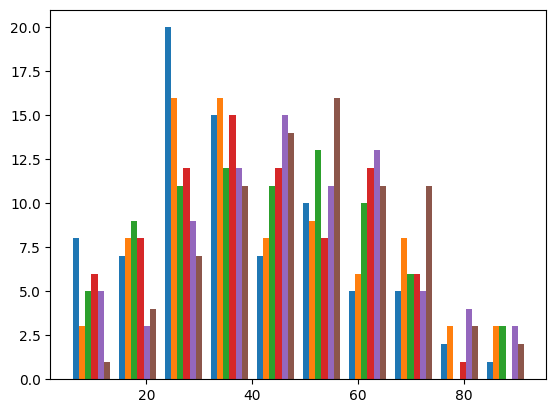

In [283]:

plt.hist(X_train[:,[0,1,2,3,4,5]])
plt.show()

# plt.hist(X_train)
# plt.show()

# X_train.hist(bins=14)
# plt.show()

In [284]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train=X_train_scaled

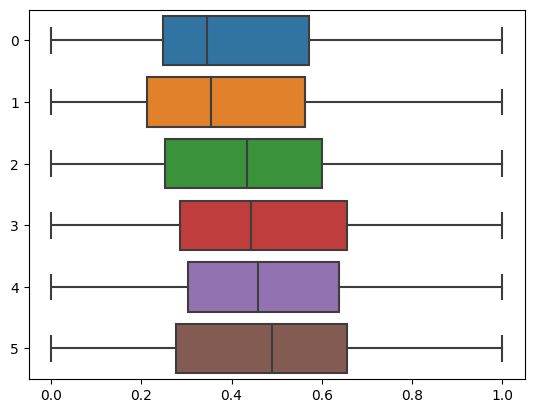

In [285]:

sns.boxplot(X_train[:,[0,1,2,3,4,5]] ,orient='h')
plt.show()

In [286]:
from sklearn.linear_model import LinearRegression

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Fit mô hình trên tập train đã được chuẩn hóa
model.fit(X_train, y_train)

LinearRegression()

In [287]:
from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
#to retrieve the intercept
print(model.intercept_)
#for retrieving the slope 
print(model.coef_)

[-3.23225329e+14]
[[ 5.03163157e-01  2.21079860e-02 -6.03876280e-01 -4.16413141e-01
   1.70310631e-01  1.54871252e+00  3.23225329e+14  3.23225329e+14]]


In [288]:
from sklearn.metrics import mean_absolute_error

# Dự đoán trên tập train
y_train_pred = model.predict(X_train)

# Dự đoán trên tập test 
y_test_pred = model.predict(X_test)

# Tính MAE trên tập train và test
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("MAE on Train Set:", mae_train)
print("MAE on Test Set:", mae_test)

MAE on Train Set: 0.71953125
MAE on Test Set: 8.159375


In [291]:
# Áp dụng dự báo cho giá trị T1, T2, T3, T4, T5, T6 và GT đã cho
new_data = np.array([5.0, 6.5, 7.0, 7.0, 6.5, 6.0, 1, 0]).reshape(1, -1)  # GT=MALE encoded as 1, FEMALE as 0
logic_score = model.predict(new_data)

print("Predicted LOGIC Score:", logic_score[0])


Predicted LOGIC Score: [10.0625]
